## Installing

In [1]:
!pip3 install regex pandas numpy scikit-learn wordcloud matplotlib '''gensim''' transformers nltk yellowbrick '''umap''' seaborn torch torchvision torchaudio --upgrade sentence-transformers

In [2]:
import re
import math
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.ticker import MaxNLocator


## Loading the data

In [3]:
#### wordcloud
MAX_WORDS = 20
COLLOCATION = 1 #5
COLLOCATIONS = False

In [4]:
DATA = "../Errors_data.csv"

df = pd.read_csv(DATA,header=None, names=['Error', 'Category','x','y'])
df = df.drop(['x','y'], axis=1)
df.head(10)


,Error,Category
0,Missing package-info java file,JavadocPackage
1,Utility classes should not have a public or de...,HideUtilityClassConstructor
2,Missing a Javadoc comment,MissingJavadocMethod
3,Parameter args should be final,FinalParameters
4,File contains tab characters (this is the firs...,FileTabCharacter
5,Line has trailing spaces,RegexpSingleline
6,Line has trailing spaces,RegexpSingleline
7,Line is longer than characters (found ),LineLength
8,Line has trailing spaces,RegexpSingleline
9,Line is longer than characters (found ),LineLength


In [5]:
df.shape

(13993, 2)

In [6]:
print("Total unique categories:", df['Category'].nunique())

Total unique categories: 65


In [7]:
math.sqrt(df['Category'].nunique())

8.06225774829855

In [8]:
df.iloc[182]['Error']

"'||' is not preceded with whitespace"

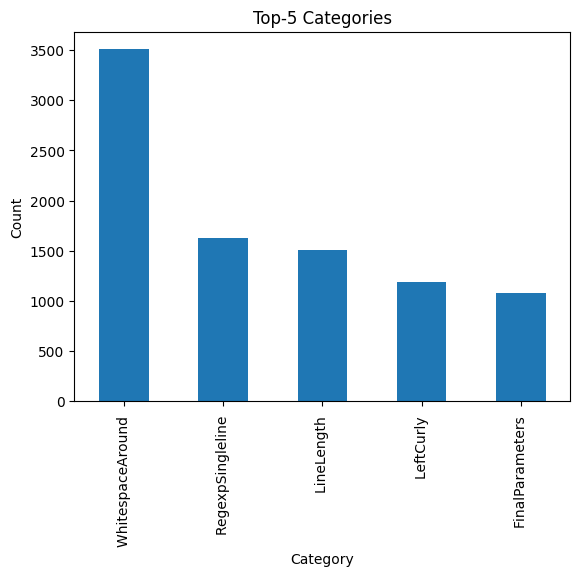

In [9]:
# df['Ctegory'].value_counts().plot.bar()

ax = df['Category'].value_counts().head(5).plot.bar()

ax.set_title('Top-5 Categories')
ax.set_xlabel('Category')
ax.set_ylabel('Count')

plt.show()

In [10]:
# Remove whitespace around plot
fig = ax.get_figure()
fig.tight_layout()

# Save just the plot area to PDF
fig.savefig('./top5_category.pdf', bbox_inches='tight')

<Axes: xlabel='Category'>

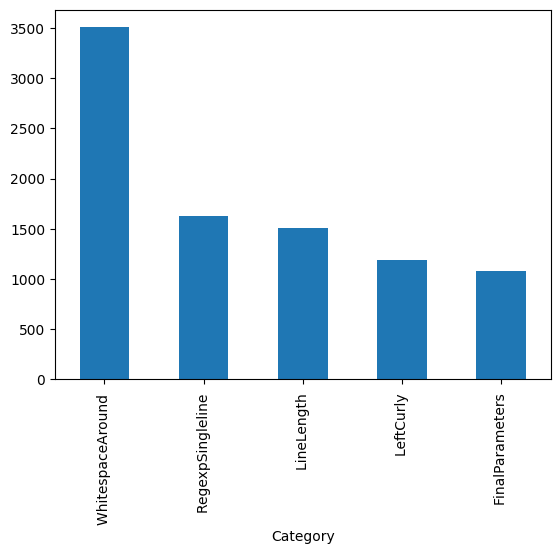

In [11]:
df['Category'].value_counts().head(5).plot.bar()

<Axes: xlabel='Category'>

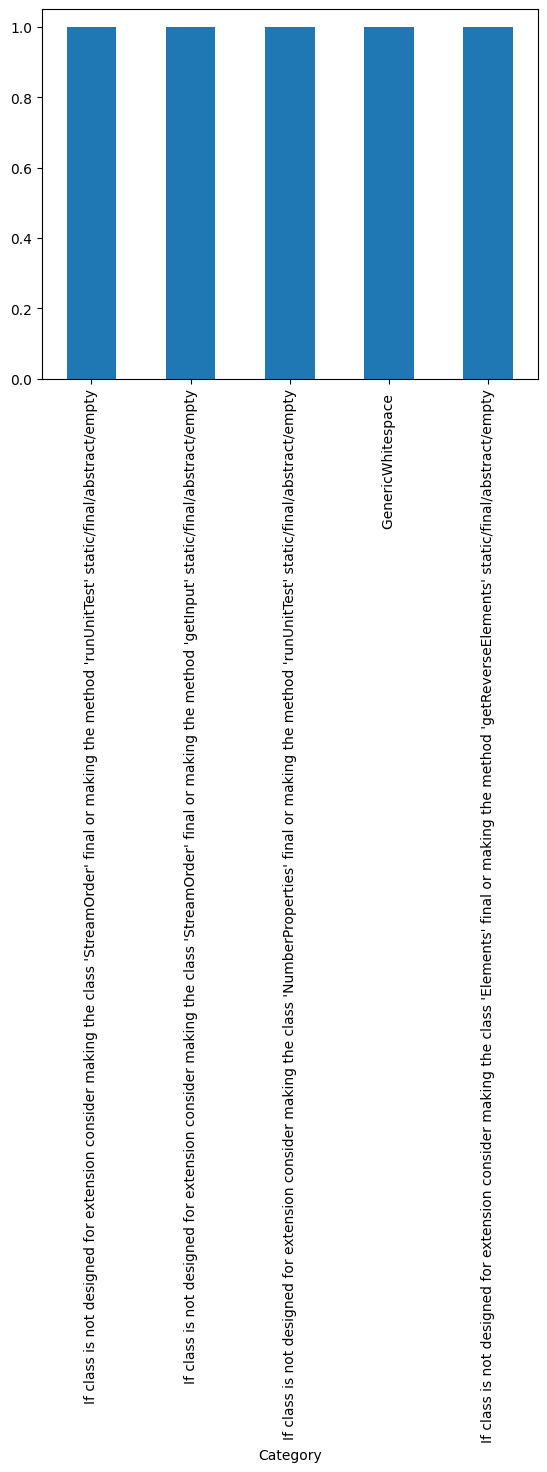

In [12]:
df['Category'].value_counts().tail(5).plot.bar()

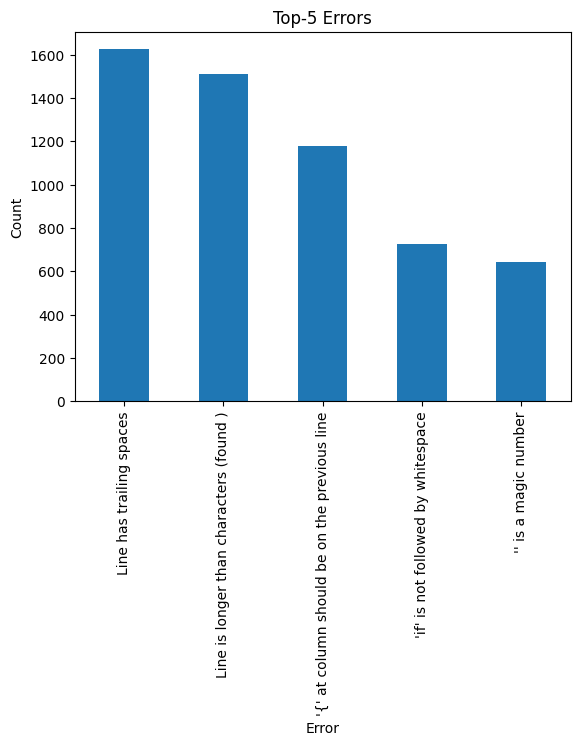

In [13]:
# df['Ctegory'].value_counts().plot.bar()

ax = df['Error'].value_counts().head(5).plot.bar()

ax.set_title('Top-5 Errors')
ax.set_xlabel('Error')
ax.set_ylabel('Count')

plt.show()

In [14]:
# Remove whitespace around plot
fig = ax.get_figure()
# fig.tight_layout()

# Save just the plot area to PDF
fig.savefig('./top5_error.pdf', bbox_inches='tight')

## Preprocessing the data

In [15]:
def preprocessing(text):

    # text = text.replace("/home/imhmede/workspace/hello.java:", "")
    # text = text.split()
    # text = [txt for i, txt in enumerate(text) if i!= 1]
    # print(text)
    # text = " ".join(text)
    # text = change_construct(text)
    # text = re.sub(r'[^\w\s\<\>]', '', text)
    # text = [txt.strip() for txt in text.split() if not txt.isdigit()]
    # text = " ".join(text)
    # text = text.replace('_', '')
    # text = text.lower()
    # text = text.replace("error", "<ERROR>")
    # text = text.replace("warn", "<WARN>")
    # # txt = re.sub(' +', ' ', text)
    # text = text.split()
    # text = " ".join(text)
    text = change_name_next(text)
    # text = change_def_next(text)
    text = change_class_next(text)
    text = change_method_next(text)
    text = change_brackets(text)
    text = change_isnot(text)
    text = change_construct(text)
    text = change_use_brackets(text)
    text = change_shouldbe(text)
    text = change_parameter_next(text)

    text = text.lower()
    return text


In [16]:
def change_name_next(text):
    l = text.split()
    j = ['<A_NAME>' if i>0 and l[i-1] in ["Name"] else l[i] for i in range(len(l))]
    return ' '.join(j)


In [17]:
def change_def_next(text):
    l = text.split()
    j = ['<A_FUNC_NAME>' if i>0 and l[i-1] in ["def"] else l[i] for i in range(len(l))]
    return ' '.join(j)


In [18]:
def change_class_next(text):
    l = text.split()
    j = ['<A_CLASS_NAME>' if i>0 and l[i-1] in ["Class"] else l[i] for i in range(len(l))]
    return ' '.join(j)


In [19]:
def change_parameter_next(text):
    l = text.split()
    j = ['<A_PARAMETER_NAME>' if i>0 and l[i-1] in ["Parameter"] else l[i] for i in range(len(l))]
    return ' '.join(j)


In [20]:
def change_method_next(text):
    l = text.split()
    j = ['<A_METHOD_NAME>' if i>0 and l[i-1] in ["method"] else l[i] for i in range(len(l))]
    return ' '.join(j)


In [21]:
def change_brackets(text):
    return re.sub(r"'[{()}]'", "<BRAKET>", text)

In [22]:
def change_construct(text):
    return re.sub(r"'[a-zA-Z]+'", "<CONSTRUCT>", text)

In [23]:
def change_isnot(text):
  if " is not" in text:
    new_text = re.sub(r'(^.*) is not', r'<OPERATOR> is not', text)
  else:
    new_text = text

  return new_text

In [24]:
def change_shouldbe(text):
  if " should be on" in text:
    new_text = re.sub(r'(^.*) should be on', r'<OPERATOR> should be on', text)
  else:
    new_text = text

  return new_text

In [25]:
def change_construct(text):
  if " construct must use" in text:
    new_text = re.sub(r'(^.*) construct must use', r'<OPERATOR> construct must use', text)
  else:
    new_text = text

  return new_text

In [26]:
def change_use_brackets(text):
  if "'{}'s" in text:
    new_text = re.sub(r"'{}'s", r"<BRACKET>", text)
  else:
    new_text = text

  return new_text

In [27]:
# n_text = preprocessing(content_list[160])
# print(n_text)


In [28]:
# id_ = 1002
id_ = 103
print(df.iloc[id_]['Error'])

n_text = preprocessing(df.iloc[id_]['Error'])
print(n_text)

'*' is not followed by whitespace
<operator> is not followed by whitespace


## Create a dataframe

In [29]:
df['clean'] = df['Error'].apply(preprocessing)

In [30]:
df.head()

,Error,Category,clean
0,Missing package-info java file,JavadocPackage,missing package-info java file
1,Utility classes should not have a public or de...,HideUtilityClassConstructor,utility classes should not have a public or de...
2,Missing a Javadoc comment,MissingJavadocMethod,missing a javadoc comment
3,Parameter args should be final,FinalParameters,parameter <a_parameter_name> should be final
4,File contains tab characters (this is the firs...,FileTabCharacter,file contains tab characters (this is the firs...


In [31]:
df.iloc[1]["clean"]

'utility classes should not have a public or default constructor'

In [32]:
df.iloc[114]["clean"]

'<operator> is not preceded with whitespace'

In [33]:
df.iloc[114]["clean"]

'<operator> is not preceded with whitespace'

## Create a Word Cloud

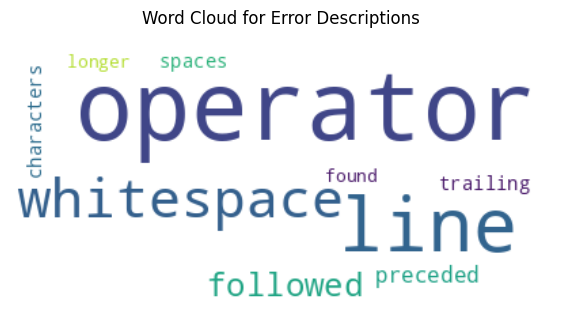

In [34]:
all_text = []
def get_all_text(text):
    all_text.append(text)

df["clean"].apply(get_all_text)
text = "\n".join(all_text)
# print(text)

# wordcloud = WordCloud(background_color="white").generate(text)

#Create the wordcloud object
wordcloud = WordCloud(collocations= False,
                        background_color="white",
                        collocation_threshold = 100,
                        max_words = 10,
                        relative_scaling = 1).generate(text)
#plot
plt.figure(figsize=(7,5), dpi=100)
plt.imshow(wordcloud, interpolation='bilInear')
plt.axis('off')
plt.title("Word Cloud for Error Descriptions")
plt.savefig("./wordcloud.pdf", bbox_inches='tight')
plt.show()

In [35]:
# Process text
frequencies = wordcloud.process_text(text)

print(frequencies)

{'missing': 890, 'package': 395, 'info': 390, 'java': 453, 'file': 650, 'utility': 378, 'classes': 378, 'public': 378, 'default': 380, 'constructor': 378, 'javadoc': 713, 'comment': 691, 'parameter': 1080, 'a_parameter_name': 1080, 'final': 1080, 'contains': 370, 'tab': 72, 'characters': 1582, 'first': 279, 'instance': 72, 'line': 4668, 'trailing': 1624, 'spaces': 1624, 'longer': 1510, 'found': 1510, 'magic': 711, 'number': 711, 'operator': 6039, 'preceded': 1853, 'whitespace': 4656, 'previous': 1193, 'followed': 2803, 'end': 394, 'newline': 187, 'array': 49, 'illegal': 47, 'position': 47, 'construct': 131, 'must': 508, 'use': 131, 'bracket': 178, 'placed': 191, 'wrong': 191, 'location': 191, 'next': 298, 'part': 298, 'multi': 298, 'block': 600, 'statement': 341, 'one': 300, 'directly': 298, 'multiple': 298, 'try': 298, 'catch': 298, 'finally': 298, 'unused': 92, 'import': 65, 'io': 12, 'name': 317, 'a_name': 316, 'match': 315, 'pattern': 315, 'za': 627, 'z': 315, "int'": 26, 'sentence

## Using Bert

In [36]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize

In [37]:
DIMENSIONS = 64
WINDOW = 5

In [38]:
all_texts = df['clean'].tolist()
all_texts = [text.split() for text in all_texts]
print(len(all_texts))

13993


In [39]:
print(all_texts[:2])
print(all_texts[-2:])

[['missing', 'package-info', 'java', 'file'], ['utility', 'classes', 'should', 'not', 'have', 'a', 'public', 'or', 'default', 'constructor']]
[['line', 'has', 'trailing', 'spaces'], ['line', 'has', 'trailing', 'spaces']]


In [40]:
df["textList"] = all_texts

In [41]:
df

,Error,Category,clean,textList
0,Missing package-info java file,JavadocPackage,missing package-info java file,"[missing, package-info, java, file]"
1,Utility classes should not have a public or de...,HideUtilityClassConstructor,utility classes should not have a public or de...,"[utility, classes, should, not, have, a, publi..."
2,Missing a Javadoc comment,MissingJavadocMethod,missing a javadoc comment,"[missing, a, javadoc, comment]"
3,Parameter args should be final,FinalParameters,parameter <a_parameter_name> should be final,"[parameter, <a_parameter_name>, should, be, fi..."
4,File contains tab characters (this is the firs...,FileTabCharacter,file contains tab characters (this is the firs...,"[file, contains, tab, characters, (this, is, t..."
...,...,...,...,...
13988,Parameter args should be final,FinalParameters,parameter <a_parameter_name> should be final,"[parameter, <a_parameter_name>, should, be, fi..."
13989,Line has trailing spaces,RegexpSingleline,line has trailing spaces,"[line, has, trailing, spaces]"
13990,Line has trailing spaces,RegexpSingleline,line has trailing spaces,"[line, has, trailing, spaces]"
13991,Line has trailing spaces,RegexpSingleline,line has trailing spaces,"[line, has, trailing, spaces]"


In [42]:
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(all_texts)]

### Get embeddings for multiple dimensions

In [43]:
from transformers import BertTokenizer, BertModel
import torch
from tqdm import tqdm
tqdm.pandas()

print("Cuda??? " + str(torch.cuda.is_available()))

if torch.cuda.is_available():
    device = torch.device("cpu")
    # device = torch.device("cuda:0")
    print("Using GPU:", torch.cuda.get_device_name(0))
else:
    device = torch.device("cpu")
    print("Using CPU")

Cuda??? True
Using GPU: AMD Radeon RX 6700 XT


In [44]:
from sentence_transformers import SentenceTransformer, util

model = SentenceTransformer("sentence-transformers/all-MiniLM-L6-v2")
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model_bert = BertModel.from_pretrained('bert-base-uncased')
model.to(device)
# tokenizer.to(device)
model_bert.to(device)
print("Failure is the best path to success")### Added a little note because i didn't want to keep seeing the entire bert layout get printed

Failure is the best path to success


In [45]:
# Create a function to get BERT embeddings
def get_bert_embeddings(text):
    # Ensure the text is a string
    if isinstance(text, torch.Tensor):
        text = str(text.item())  # Convert the tensor to a string

    inputs = tokenizer(text, return_tensors='pt', padding=True, truncation=True).to(device)

    with torch.no_grad():
        output = model_bert(**inputs)

    embeddings = output.last_hidden_state.cpu().numpy()
    return embeddings

In [46]:
df['cleanV2'] = df['clean'].progress_apply(lambda x: str(x) if isinstance(x, torch.Tensor) else x)
df['embedding_bert'] = df['cleanV2'].progress_apply(get_bert_embeddings)

df.to_pickle("Pickled")

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 13993/13993 [14:54<00:00, 15.65it/s]


In [126]:
import pandas as pd

In [127]:
df = pd.read_pickle("Pickled")

In [128]:
print(df.head())

                                               Error  \
0                     Missing package-info java file   
1  Utility classes should not have a public or de...   
2                          Missing a Javadoc comment   
3                     Parameter args should be final   
4  File contains tab characters (this is the firs...   

                       Category  \
0               JavadocPackage    
1  HideUtilityClassConstructor    
2         MissingJavadocMethod    
3              FinalParameters    
4             FileTabCharacter    

                                               clean  \
0                     missing package-info java file   
1  utility classes should not have a public or de...   
2                          missing a javadoc comment   
3       parameter <a_parameter_name> should be final   
4  file contains tab characters (this is the firs...   

                                            textList  \
0                [missing, package-info, java, file]   
1  

In [129]:
def extract_value(embedding_list):
    return embedding_list[0][0]

print(df['embedding_bert'].shape)
print(df['embedding_bert'][0].shape)
print(df['embedding_bert'][0][0].shape)
print(df['embedding_bert'][0][0][0].shape)

df['embedding']=df['embedding_bert'].apply(extract_value)

print("\nAfter")
print(df['embedding'].shape)
print(df['embedding'][0].shape)

(13993,)
(1, 8, 768)
(8, 768)
(768,)

After
(13993,)
(768,)


### Get the explained variance

In [130]:
from sklearn.decomposition import PCA

In [131]:
# PCA analysis
variance_explained = []
col = 'embedding'
print(col)
embeddings=df[col].tolist()
pca = PCA(n_components=2)
pca.fit(embeddings)
variance_explained.append(pca.explained_variance_ratio_.sum().round(2))

embedding


In [132]:
print(variance_explained)

[0.52]


In [133]:
# # Plot variance explained
# import matplotlib.pyplot as plt
# plt.plot(dims, variance_explained)
# # Set x ticks
# plt.xticks(dims,rotation=90)

# plt.title('Variance Explained vs Dimensionality')
# plt.xlabel('Dimensions')
# plt.ylabel('Variance Explained')
# plt.savefig("./embeddings_variance.pdf", bbox_inches='tight')
# plt.show()

## Let's find the best k for clustering

In [134]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score


In [135]:
# Range of k to check
k_range = range(2, 30)

sil_scores = []
cal_scores = []

for k in k_range:
  # Cluster data into k clusters
  kmeans = KMeans(n_clusters=k)
  clusters = kmeans.fit_predict(df['embedding'][0].reshape(-1, 1).tolist())

  # Score with metrics
  sil_score = silhouette_score(df['embedding'][0].reshape(-1, 1).tolist(), clusters)
  sil_scores.append(sil_score)

  cal_score = calinski_harabasz_score(df['embedding'][0].reshape(-1, 1).tolist(), clusters)
  cal_scores.append(cal_score)


/home/bassturtle4/Desktop/SynologyDrive/2023yearproject/Training/env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/bassturtle4/Desktop/SynologyDrive/2023yearproject/Training/env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/bassturtle4/Desktop/SynologyDrive/2023yearproject/Training/env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/bass

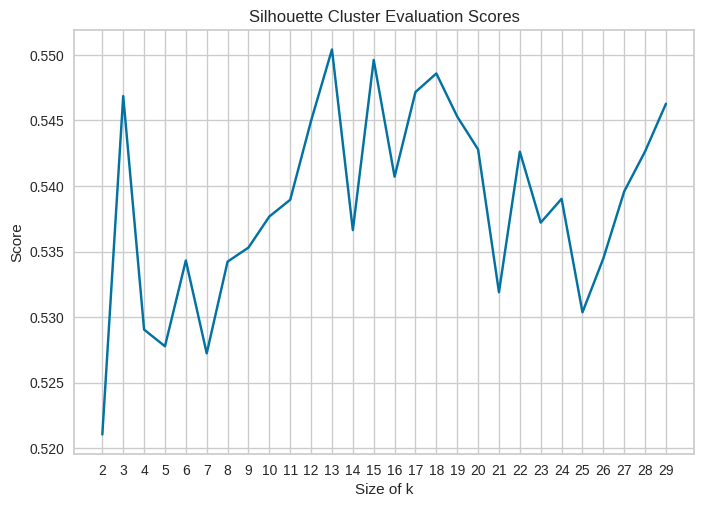

In [136]:
# Plot scores
plt.plot(k_range, sil_scores, label='Silhouette')
new_list = range(math.floor(min(k_range)), math.ceil(max(k_range))+1)
plt.xticks(new_list)
plt.title('Silhouette Cluster Evaluation Scores')
plt.xlabel('Size of k')
plt.ylabel('Score')
#plt.legend()
plt.savefig("./shilouette_k.pdf", bbox_inches='tight')
plt.show()

In [137]:
print(sil_scores)

[0.5210631755309874, 0.5468618653672225, 0.5290612842045349, 0.5277854986820723, 0.5343274395549933, 0.5272483035869019, 0.5342405496817134, 0.5353104794581317, 0.5376801172084829, 0.5389554193376805, 0.544977056506827, 0.5504137105059546, 0.5366421684795489, 0.5496173690673383, 0.5407157769178775, 0.5471690791272432, 0.5485836288487634, 0.5452989665254137, 0.5427927599445489, 0.5319051370768264, 0.5426199259183843, 0.5372138973630068, 0.5390293142192776, 0.5303775763442802, 0.5344837773618084, 0.5395919463686578, 0.5426421957112608, 0.5462803331339291]


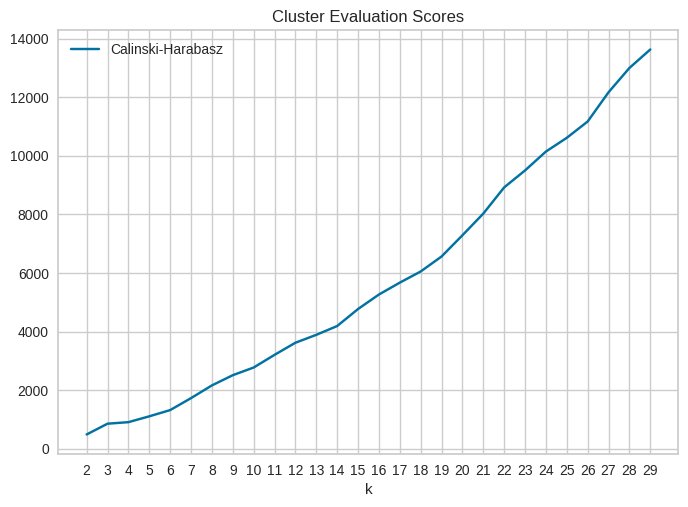

In [138]:
# Plot scores
plt.plot(k_range, cal_scores, label='Calinski-Harabasz')
new_list = range(math.floor(min(k_range)), math.ceil(max(k_range))+1)
plt.xticks(new_list)
plt.title('Cluster Evaluation Scores')
plt.xlabel('k')
plt.legend()
plt.show()

It looks that k=7 is fine

### Lets use the 128 dimensions and 7 clusters

In [139]:
all_d2v_vecs = df['embedding'].tolist()

In [140]:
np.shape(all_d2v_vecs)

(13993, 768)

In [141]:
all_d2v_vecs[0]

array([-6.80973828e-01,  5.20207454e-03, -4.87170190e-01,  1.16731063e-01,
        6.52138814e-02, -1.26809105e-01,  2.81854589e-02,  5.06244898e-01,
       -3.98653448e-01,  1.88244075e-01, -4.24147129e-01, -6.14200756e-02,
       -1.22033097e-01,  3.88244539e-01, -1.01146936e-01, -1.40547231e-01,
        2.91313753e-02,  5.42059541e-01, -1.78371668e-01, -2.39323109e-01,
       -2.21750453e-01, -6.47435188e-01, -3.29549700e-01, -4.68357801e-01,
        7.99250826e-02, -2.50609756e-01, -2.57753789e-01, -8.35110173e-02,
       -5.45791507e-01,  1.80338435e-02, -2.01662108e-01, -2.47294024e-01,
        9.76588801e-02, -2.90678829e-01,  9.02268171e-01, -1.10516183e-01,
        4.67066497e-01, -3.27588916e-02,  4.08238858e-01,  7.69297630e-02,
        1.08067855e-01,  5.32119274e-02,  6.29025757e-01,  2.06378877e-01,
        2.96455681e-01, -2.58088820e-02, -2.86764503e+00, -2.75297947e-02,
       -3.93995523e-01, -1.38849720e-01,  1.51911467e-01, -2.03737304e-01,
        5.18945813e-01,  

In [142]:
CLUSTER_COUNT=13

In [143]:
kmeans = KMeans(n_clusters=CLUSTER_COUNT, random_state=0).fit(all_d2v_vecs)

/home/bassturtle4/Desktop/SynologyDrive/2023yearproject/Training/env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [144]:
kmeans.labels_

array([ 8, 10,  9, ...,  4,  4,  4], dtype=int32)

In [145]:
df["d2v_clusters"] = kmeans.labels_
df

,Error,Category,clean,textList,cleanV2,embedding_bert,embedding,d2v_clusters
0,Missing package-info java file,JavadocPackage,missing package-info java file,"[missing, package-info, java, file]",missing package-info java file,"[[[-0.6809738, 0.0052020745, -0.4871702, 0.116...","[-0.6809738, 0.0052020745, -0.4871702, 0.11673...",8
1,Utility classes should not have a public or de...,HideUtilityClassConstructor,utility classes should not have a public or de...,"[utility, classes, should, not, have, a, publi...",utility classes should not have a public or de...,"[[[-0.14214818, 0.039027303, -0.3259492, -0.03...","[-0.14214818, 0.039027303, -0.3259492, -0.0338...",10
2,Missing a Javadoc comment,MissingJavadocMethod,missing a javadoc comment,"[missing, a, javadoc, comment]",missing a javadoc comment,"[[[-0.207906, 0.010028605, -0.2713327, -0.0819...","[-0.207906, 0.010028605, -0.2713327, -0.081969...",9
3,Parameter args should be final,FinalParameters,parameter <a_parameter_name> should be final,"[parameter, <a_parameter_name>, should, be, fi...",parameter <a_parameter_name> should be final,"[[[-0.18806006, -0.2291208, -0.2013911, -0.129...","[-0.18806006, -0.2291208, -0.2013911, -0.12910...",7
4,File contains tab characters (this is the firs...,FileTabCharacter,file contains tab characters (this is the firs...,"[file, contains, tab, characters, (this, is, t...",file contains tab characters (this is the firs...,"[[[-0.38900688, -0.18917695, -0.06514917, 0.03...","[-0.38900688, -0.18917695, -0.06514917, 0.0375...",6
...,...,...,...,...,...,...,...,...
13988,Parameter args should be final,FinalParameters,parameter <a_parameter_name> should be final,"[parameter, <a_parameter_name>, should, be, fi...",parameter <a_parameter_name> should be final,"[[[-0.18806006, -0.2291208, -0.2013911, -0.129...","[-0.18806006, -0.2291208, -0.2013911, -0.12910...",7
13989,Line has trailing spaces,RegexpSingleline,line has trailing spaces,"[line, has, trailing, spaces]",line has trailing spaces,"[[[-0.46882874, 0.09793672, 0.20342295, 0.2611...","[-0.46882874, 0.09793672, 0.20342295, 0.261186...",4
13990,Line has trailing spaces,RegexpSingleline,line has trailing spaces,"[line, has, trailing, spaces]",line has trailing spaces,"[[[-0.46882874, 0.09793672, 0.20342295, 0.2611...","[-0.46882874, 0.09793672, 0.20342295, 0.261186...",4
13991,Line has trailing spaces,RegexpSingleline,line has trailing spaces,"[line, has, trailing, spaces]",line has trailing spaces,"[[[-0.46882874, 0.09793672, 0.20342295, 0.2611...","[-0.46882874, 0.09793672, 0.20342295, 0.261186...",4


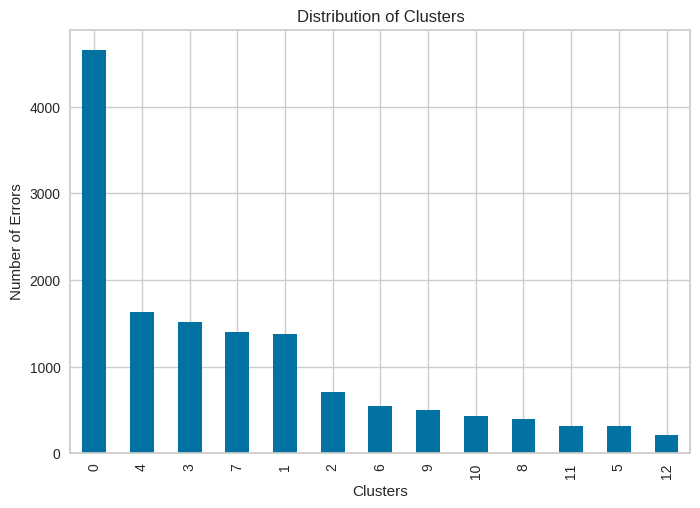

In [146]:
ax = df['d2v_clusters'].value_counts().plot.bar()

ax.set_title('Distribution of Clusters')
ax.set_xlabel('Clusters')
ax.set_ylabel('Number of Errors')

plt.show()

In [147]:
# Remove whitespace around plot
fig = ax.get_figure()
# fig.tight_layout()

# Save just the plot area to PDF
fig.savefig('./hist_clusters.pdf', bbox_inches='tight')

In [148]:
clust_number = 2
print(df[df['d2v_clusters'] == clust_number]['clean'])
print(df[df['d2v_clusters'] == clust_number]['clean'].count())

14       '' is a magic number
15       '' is a magic number
16       '' is a magic number
17       '' is a magic number
85       '' is a magic number
                 ...         
13892    '' is a magic number
13894    '' is a magic number
13914    '' is a magic number
13920    '' is a magic number
13922    '' is a magic number
Name: clean, Length: 711, dtype: object
711


In [149]:
clust_number = 0
print(df[df['d2v_clusters'] == clust_number]['clean'])
print(df[df['d2v_clusters'] == clust_number]['clean'].count())

21       <operator> is not preceded with whitespace
31         <operator> is not followed by whitespace
32       <operator> is not preceded with whitespace
45       <operator> is not preceded with whitespace
66       <operator> is not preceded with whitespace
                            ...                    
13970          <braket> is preceded with whitespace
13973      <operator> is not followed by whitespace
13974      <operator> is not followed by whitespace
13975          <braket> is preceded with whitespace
13976    <operator> is not preceded with whitespace
Name: clean, Length: 4654, dtype: object
4654


In [150]:
clust_number = 5
print(df[df['d2v_clusters'] == clust_number]['clean'])
print(df[df['d2v_clusters'] == clust_number]['clean'].count())

308       name <a_name> must match pattern '^a-za-za-z-*$'
326       name <a_name> must match pattern '^a-za-za-z-*$'
337       name <a_name> must match pattern '^a-za-za-z-*$'
374       name <a_name> must match pattern '^a-za-za-z-*$'
567       name <a_name> must match pattern '^a-za-za-z-*$'
                               ...                        
13773     name <a_name> must match pattern '^a-za-za-z-*$'
13822     name <a_name> must match pattern '^a-za-za-z-*$'
13897    name <a_name> laba' must match pattern '^a-z+(...
13930     name <a_name> must match pattern '^a-za-za-z-*$'
13966     name <a_name> must match pattern '^a-za-za-z-*$'
Name: clean, Length: 318, dtype: object
318


In [151]:
clust_number = 1
print(df[df['d2v_clusters'] == clust_number]['clean'])
print(df[df['d2v_clusters'] == clust_number]['clean'].count())

26       <operator> should be on the previous line
69              array brackets at illegal position
289      <operator> should be on the previous line
309      <operator> should be on the previous line
312      <operator> should be on the previous line
                           ...                    
13979    <operator> should be on the previous line
13980    <operator> should be on the previous line
13981    <operator> should be on the previous line
13982    <operator> should be on the previous line
13986    <operator> should be on the previous line
Name: clean, Length: 1380, dtype: object
1380


In [152]:
clust_number = 6
print(df[df['d2v_clusters'] == clust_number]['clean'])
print(df[df['d2v_clusters'] == clust_number]['clean'].count())

4        file contains tab characters (this is the firs...
42       file contains tab characters (this is the firs...
62                        file does not end with a newline
285                       file does not end with a newline
290      file contains tab characters (this is the firs...
                               ...                        
13859    using the ' *' form of import should be avoide...
13902                     file does not end with a newline
13904    using the ' *' form of import should be avoide...
13960                     file does not end with a newline
13983                     file does not end with a newline
Name: clean, Length: 543, dtype: object
543


In [153]:
clust_number = 3
print(df[df['d2v_clusters'] == clust_number]['clean'])
print(df[df['d2v_clusters'] == clust_number]['clean'].count())

7        line is longer than characters (found )
9        line is longer than characters (found )
18       line is longer than characters (found )
27       line is longer than characters (found )
28       line is longer than characters (found )
                          ...                   
13938    line is longer than characters (found )
13946    line is longer than characters (found )
13952    line is longer than characters (found )
13954    line is longer than characters (found )
13964    line is longer than characters (found )
Name: clean, Length: 1510, dtype: object
1510


In [154]:
clust_number = 4
print(df[df['d2v_clusters'] == clust_number]['clean'])
print(df[df['d2v_clusters'] == clust_number]['clean'].count())

5        line has trailing spaces
6        line has trailing spaces
8        line has trailing spaces
22       line has trailing spaces
23       line has trailing spaces
                   ...           
13968    line has trailing spaces
13989    line has trailing spaces
13990    line has trailing spaces
13991    line has trailing spaces
13992    line has trailing spaces
Name: clean, Length: 1624, dtype: object
1624


### Silhouette Score

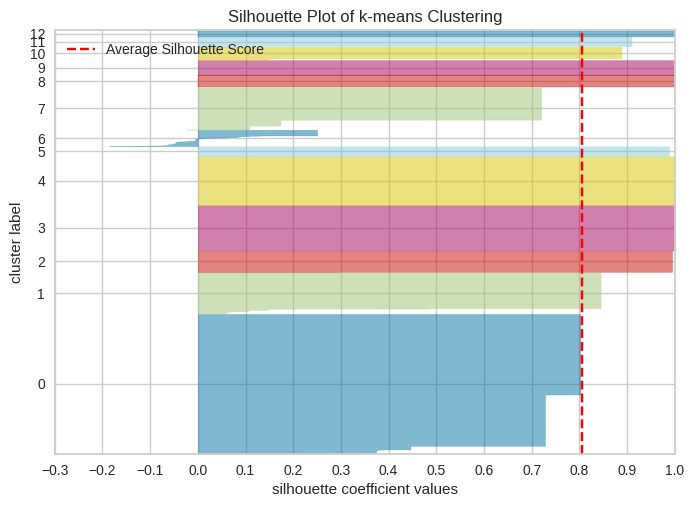

<Axes: title={'center': 'Silhouette Plot of k-means Clustering'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [155]:

from yellowbrick.cluster import SilhouetteVisualizer


# Assuming 'embedding128' is your pandas Series containing embeddings
# Convert the Series to a list of lists
embedding_list = df['embedding'].tolist()
embedding_list_of_lists = np.array([embedding.tolist() for embedding in embedding_list])

# Create a SilhouetteVisualizer instance
title = "Silhouette Plot of k-means Clustering"
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick', title=title)


# Fit the visualizer with the standardized embedding data
visualizer.fit(embedding_list_of_lists)
# Export the plot to a PDF with a tight layout
visualizer.show(outpath="./silhouette_plot.pdf")

# Display the visualization
visualizer.poof()

### Let's use UMAP to plot the clusters


In [156]:
data_embeds = pd.DataFrame()
data_embeds['embeds'] = df["embedding"]
print(data_embeds.head())
print(data_embeds.shape)


                                              embeds
0  [-0.6809738, 0.0052020745, -0.4871702, 0.11673...
1  [-0.14214818, 0.039027303, -0.3259492, -0.0338...
2  [-0.207906, 0.010028605, -0.2713327, -0.081969...
3  [-0.18806006, -0.2291208, -0.2013911, -0.12910...
4  [-0.38900688, -0.18917695, -0.06514917, 0.0375...
(13993, 1)


In [157]:
!pip install --quiet umap-learn


In [158]:
import umap.umap_ as umap # REDUCE DIMENSIONALITY
import seaborn as sns
sns.color_palette('colorblind')

[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
 (0.9254901960784314, 0.8823529411764706, 0.2),
 (0.33725490196078434, 0.7058823529411765, 0.9137254901960784)]

In [159]:
X_umap = umap.UMAP().fit_transform(data_embeds['embeds'].tolist())

In [160]:
X_umap

array([[ 25.184769  ,   0.62884504],
       [  2.4092112 , -16.218807  ],
       [  2.1861196 ,  12.46406   ],
       ...,
       [  8.949326  ,  -8.264522  ],
       [ 10.128134  ,  -8.525132  ],
       [  9.365261  ,  -8.19575   ]], dtype=float32)

In [161]:
data_df = pd.DataFrame()
data_df['x'] = X_umap[:,0]
data_df['y'] = X_umap[:, 1]
data_df['cluster'] = df['d2v_clusters']

In [162]:
data_df

,x,y,cluster
0,25.184769,0.628845,8
1,2.409211,-16.218807,10
2,2.186120,12.464060,9
3,17.366161,1.755235,7
4,14.014620,-16.969404,6
...,...,...,...
13988,16.902199,1.653038,7
13989,9.139359,-9.023917,4
13990,8.949326,-8.264522,4
13991,10.128134,-8.525132,4


In [163]:
data_df['clus'] = data_df['cluster'].apply(lambda x: str(x))
data_df

,x,y,cluster,clus
0,25.184769,0.628845,8,8
1,2.409211,-16.218807,10,10
2,2.186120,12.464060,9,9
3,17.366161,1.755235,7,7
4,14.014620,-16.969404,6,6
...,...,...,...,...
13988,16.902199,1.653038,7,7
13989,9.139359,-9.023917,4,4
13990,8.949326,-8.264522,4,4
13991,10.128134,-8.525132,4,4


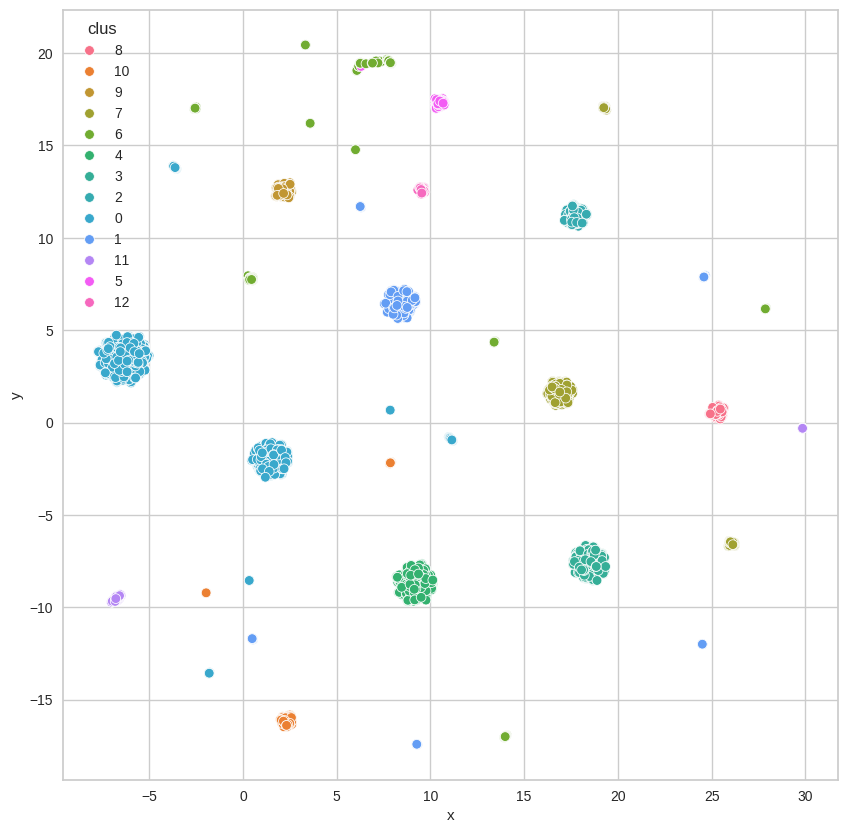

In [164]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=data_df, x="x", y="y", hue='clus')
plt.savefig("./full_clusters.pdf", bbox_inches='tight')
plt.show()

What about PCA and Doc2Vec?

In [165]:
#Getting unique labels
pca = PCA(2)
#Transform the data
X_pca = pca.fit_transform(data_embeds['embeds'].tolist())
X_pca

array([[ 1.78732583, -1.94615268],
       [-0.23899681,  1.97447371],
       [ 2.47999097,  0.09330499],
       ...,
       [ 3.25004839, -0.32388881],
       [ 3.25004839, -0.32388881],
       [ 3.25004839, -0.32388881]])

In [166]:
data_df = pd.DataFrame()
data_df['x'] = X_pca[:,0]
data_df['y'] = X_pca[:, 1]
data_df['cluster'] = df['d2v_clusters']

In [167]:
data_df

,x,y,cluster
0,1.787326,-1.946153,8
1,-0.238997,1.974474,10
2,2.479991,0.093305,9
3,0.712575,1.319121,7
4,1.708427,-0.747881,6
...,...,...,...
13988,0.712575,1.319121,7
13989,3.250048,-0.323889,4
13990,3.250048,-0.323889,4
13991,3.250048,-0.323889,4


In [168]:
data_df['clus'] = data_df['cluster'].apply(lambda x: str(x))
data_df

,x,y,cluster,clus
0,1.787326,-1.946153,8,8
1,-0.238997,1.974474,10,10
2,2.479991,0.093305,9,9
3,0.712575,1.319121,7,7
4,1.708427,-0.747881,6,6
...,...,...,...,...
13988,0.712575,1.319121,7,7
13989,3.250048,-0.323889,4,4
13990,3.250048,-0.323889,4,4
13991,3.250048,-0.323889,4,4


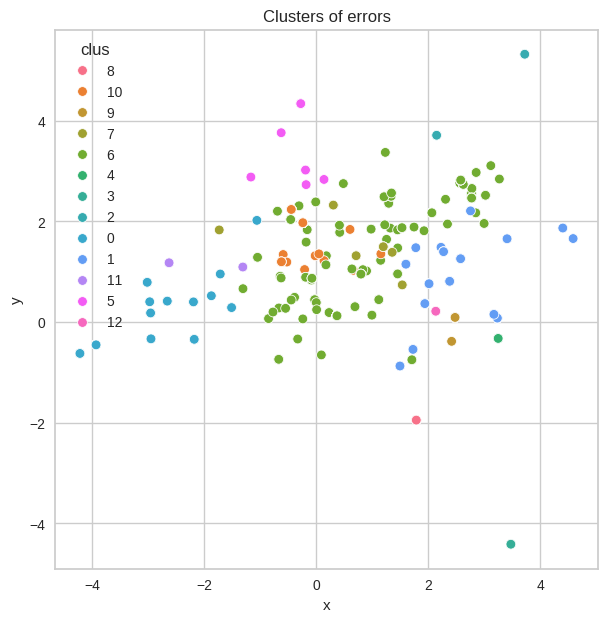

In [169]:
plt.figure(figsize=(7,7))
sns.scatterplot(data=data_df, x="x", y="y", hue='clus')

plt.title("Clusters of errors")
plt.savefig("./cluster_errors.pdf", bbox_inches='tight')
plt.show()

### t-SNE

## Let's get error closest to the centroid in each cluster

In [170]:
centroids = kmeans.cluster_centers_

In [171]:
len(centroids)

13

In [172]:
from sklearn.neighbors import NearestNeighbors

In [173]:
# Find closest to each centroid
closest_docs = []
for c, centroid in enumerate(centroids):
    nbrs = NearestNeighbors(n_neighbors=1).fit(df[df['d2v_clusters']==c]['embedding'].tolist())
    distances, indices = nbrs.kneighbors(centroid.reshape(1,-1))
    closest_doc = df[df['d2v_clusters']==c]['clean'].iloc[indices[0,0]]
    closest_doc_cat = df[df['d2v_clusters']==c]['Category'].iloc[indices[0,0]]
    closest_docs.append({c:[closest_doc, closest_doc_cat]})

In [174]:
closest_docs

[{0: ['<operator> is not followed by whitespace', 'WhitespaceAround ']},
 {1: ['<operator> should be on the previous line', 'LeftCurly ']},
 {2: ["'' is a magic number", 'MagicNumber ']},
 {3: ['line is longer than characters (found )', 'LineLength ']},
 {4: ['line has trailing spaces', 'RegexpSingleline ']},
 {5: ["name <a_name> must match pattern '^a-za-za-z-*$'", 'TypeName ']},
 {6: ['file does not end with a newline', 'NewlineAtEndOfFile ']},
 {7: ['parameter <a_parameter_name> should be final', 'FinalParameters ']},
 {8: ['missing package-info java file', 'JavadocPackage ']},
 {9: ['missing a javadoc comment', 'MissingJavadocMethod ']},
 {10: ['utility classes should not have a public or default constructor',
   'HideUtilityClassConstructor ']},
 {11: ['<operator> should be on the same line as the next part of a multi-block statement (one that directly contains multiple blocks if/else-if/else do/while or try/catch/finally)',
   'RightCurly ']},
 {12: ['first sentence should end wi

### Checking the XML file

* {0: ['parameter <a_parameter_name> should be final', 'FinalParameters ']}, Miscellaneous other checks.
* {1: ['<operator> is not preceded with whitespace', 'WhitespaceAround ']}, Checks for whitespace.
* {2: ['line is longer than characters (found )', 'LineLength ']},Checks for Size Violations
* {3: ['<braket> is followed by whitespace', 'ParenPad ']},Checks for whitespace    
* {4: ['line has trailing spaces', 'RegexpSingleline ']},Miscellaneous other checks.
*  {5: ["name <a_name> must match pattern '^a-za-za-z-*$'", 'TypeName ']},Checks for Naming Conventions.
* {6: ['missing a javadoc comment', 'MissingJavadocMethod ']},Checks for Javadoc comments


## Let's try summarizing the whole cluster

In [175]:
!pip3 install gensim==3.6.0 # summarization was deprecated from 4.0

In [176]:
from gensim.summarization import summarize

In [177]:
# Group docs by cluster
docs_by_cluster = df.groupby('d2v_clusters')['Error']

In [178]:
texts = []
for d in docs_by_cluster:
    #print(d[1].values)
    text = ".".join(txt for txt in d[1].values)
    texts.append(text)

In [179]:
len(texts)

13

In [180]:
# Generate summary for each cluster (didn't work well)
#cluster_summaries = {}
#for cluster_id, cluster_docs in enumerate(texts):
#    #all_text = " ".join(cluster_docs.values)
#    #print(cluster_docs)
#    summary = summarize(cluster_docs, word_count=10)
#    cluster_summaries[cluster_id] = summary

In [181]:
texts[0]

"'{' is not preceded with whitespace.'}' is not followed by whitespace.'}' is not preceded with whitespace.'{' is not preceded with whitespace.'{' is not preceded with whitespace.'{' is not preceded with whitespace.'=' is not followed by whitespace.'=' is not preceded with whitespace.'*' is not followed by whitespace.'*' is not preceded with whitespace.'=' is not followed by whitespace.'=' is not preceded with whitespace.'*' is not followed by whitespace.'*' is not preceded with whitespace.'=' is not followed by whitespace.'=' is not preceded with whitespace.'*' is not followed by whitespace.'*' is not preceded with whitespace.'=' is not followed by whitespace.'=' is not preceded with whitespace.'*' is not followed by whitespace.'*' is not preceded with whitespace.'=' is not followed by whitespace.'=' is not preceded with whitespace.'*' is not followed by whitespace.'*' is not preceded with whitespace.'=' is not followed by whitespace.'=' is not preceded with whitespace.'*' is not foll

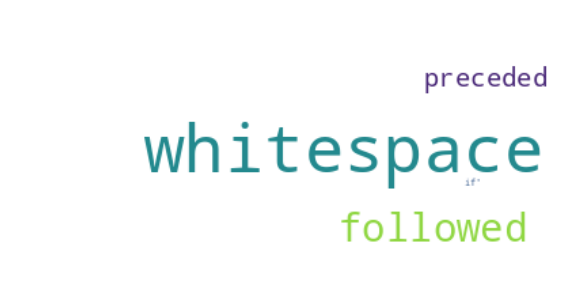

In [182]:

#Create the wordcloud object
wordcloud = WordCloud(collocations= COLLOCATIONS,
                        background_color="white",
                        collocation_threshold = COLLOCATION,
                        max_words = MAX_WORDS,
                        relative_scaling = 1).generate(texts[0])
#plot
plt.figure(figsize=(7,5), dpi=100)
plt.imshow(wordcloud, interpolation='bilInear')
plt.axis('off')

plt.show()

In [183]:
# Process text
frequencies = wordcloud.process_text(texts[0])

print(frequencies)

{'preceded': 1853, 'whitespace': 4654, 'followed': 2801, "if'": 730, "else'": 155, "int'": 24, "for'": 328, "list'": 1, "while'": 88, "typecast'": 23, "return'": 5, "finally'": 2, "catch'": 18, "try'": 8, "String'": 3, "double'": 1, "switch'": 4}


In [184]:
texts[1]

"'{' at column should be on the previous line.Array brackets at illegal position.'{' at column should be on the previous line.'{' at column should be on the previous line.'{' at column should be on the previous line.'{' at column should be on the previous line.'{' at column should be on the previous line.'{' at column should be on the previous line.Array brackets at illegal position.'{' at column should be on the previous line.'{' at column should be on the previous line.Array brackets at illegal position.'{' at column should be on the previous line.Array brackets at illegal position.'{' at column should be on the previous line.Array brackets at illegal position.'{' at column should be on the previous line.'{' at column should be on the previous line.Conditional logic can be removed.'{' at column should be on the previous line.'{' at column should be on the previous line.Conditional logic can be removed.'{' at column should be on the previous line.Conditional logic can be removed.'{' a

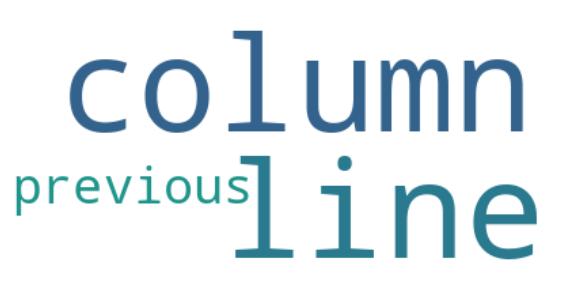

In [185]:

#Create the wordcloud object
wordcloud = WordCloud(collocations= COLLOCATIONS,
                        background_color="white",
                        collocation_threshold = COLLOCATION,
                        max_words = MAX_WORDS,
                        relative_scaling = 1).generate(texts[1])
#plot
plt.figure(figsize=(7,5), dpi=100)
plt.imshow(wordcloud, interpolation='bilInear')
plt.axis('off')

plt.show()

In [186]:
# Process text
frequencies = wordcloud.process_text(texts[1])

print(frequencies)

{'column': 1205, 'previous': 1193, 'line': 1236, 'Array': 47, 'brackets': 47, 'illegal': 47, 'position': 47, 'Conditional': 45, 'logic': 45, 'removed': 45, 'Expression': 35, 'simplified': 35, 'one': 2, 'variable': 1, 'definition': 1, 'per': 1, 'allowed': 1, 'break': 20, 'new': 17, 'Inner': 2, 'assignments': 2, 'avoided': 2, 'alone': 5, 'Empty': 6, 'statement': 7, 'Must': 1, 'least': 1, "time'": 2, 'hides': 4, 'field': 4, 'Avoid': 4, 'nested': 4, 'blocks': 4, "first'": 1, "second'": 1}


In [187]:
texts[2]

"'' is a magic number.'' is a magic number.'' is a magic number.'' is a magic number.'' is a magic number.'' is a magic number.'' is a magic number.'' is a magic number.'' is a magic number.'' is a magic number.'' is a magic number.'' is a magic number.'' is a magic number.'' is a magic number.'' is a magic number.'' is a magic number.'' is a magic number.'' is a magic number.'' is a magic number.'' is a magic number.'' is a magic number.'' is a magic number.'' is a magic number.'' is a magic number.'' is a magic number.'' is a magic number.'' is a magic number.'' is a magic number.'' is a magic number.'' is a magic number.'' is a magic number.'' is a magic number.'' is a magic number.'' is a magic number.'' is a magic number.'' is a magic number.'' is a magic number.'' is a magic number.'' is a magic number.'' is a magic number.'' is a magic number.'' is a magic number.'' is a magic number.'' is a magic number.' ' is a magic number.' ' is a magic number.'' is a magic number.'' is a ma

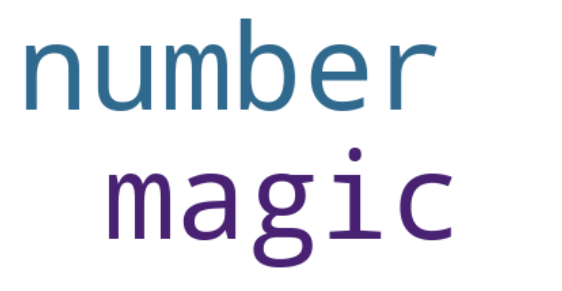

In [188]:

#Create the wordcloud object
wordcloud = WordCloud(collocations= COLLOCATIONS,
                        background_color="white",
                        collocation_threshold = COLLOCATION,
                        max_words = MAX_WORDS,
                        relative_scaling = 1).generate(texts[2])
#plot
plt.figure(figsize=(7,5), dpi=100)
plt.imshow(wordcloud, interpolation='bilInear')
plt.axis('off')

plt.show()

In [189]:
# Process text
frequencies = wordcloud.process_text(texts[2])

print(frequencies)

{'magic': 711, 'number': 711}


In [190]:
texts[3]

'Line is longer than characters (found ).Line is longer than characters (found ).Line is longer than characters (found ).Line is longer than characters (found ).Line is longer than characters (found ).Line is longer than characters (found ).Line is longer than characters (found ).Line is longer than characters (found ).Line is longer than characters (found ).Line is longer than characters (found ).Line is longer than characters (found ).Line is longer than characters (found ).Line is longer than characters (found ).Line is longer than characters (found ).Line is longer than characters (found ).Line is longer than characters (found ).Line is longer than characters (found ).Line is longer than characters (found ).Line is longer than characters (found ).Line is longer than characters (found ).Line is longer than characters (found ).Line is longer than characters (found ).Line is longer than characters (found ).Line is longer than characters (found ).Line is longer than characters (found )

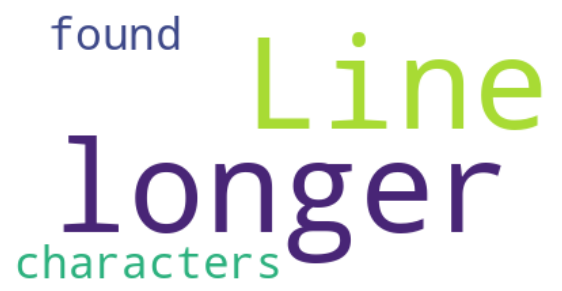

In [191]:

#Create the wordcloud object
wordcloud = WordCloud(collocations= COLLOCATIONS,
                        background_color="white",
                        collocation_threshold = COLLOCATION,
                        max_words = MAX_WORDS,
                        relative_scaling = 1).generate(texts[3])
#plot
plt.figure(figsize=(7,5), dpi=100)
plt.imshow(wordcloud, interpolation='bilInear')
plt.axis('off')

plt.show()

In [192]:
# Process text
frequencies = wordcloud.process_text(texts[3])

print(frequencies)

{'Line': 1510, 'longer': 1510, 'characters': 1510, 'found': 1510}


In [193]:
texts[4]

'Line has trailing spaces.Line has trailing spaces.Line has trailing spaces.Line has trailing spaces.Line has trailing spaces.Line has trailing spaces.Line has trailing spaces.Line has trailing spaces.Line has trailing spaces.Line has trailing spaces.Line has trailing spaces.Line has trailing spaces.Line has trailing spaces.Line has trailing spaces.Line has trailing spaces.Line has trailing spaces.Line has trailing spaces.Line has trailing spaces.Line has trailing spaces.Line has trailing spaces.Line has trailing spaces.Line has trailing spaces.Line has trailing spaces.Line has trailing spaces.Line has trailing spaces.Line has trailing spaces.Line has trailing spaces.Line has trailing spaces.Line has trailing spaces.Line has trailing spaces.Line has trailing spaces.Line has trailing spaces.Line has trailing spaces.Line has trailing spaces.Line has trailing spaces.Line has trailing spaces.Line has trailing spaces.Line has trailing spaces.Line has trailing spaces.Line has trailing spaces

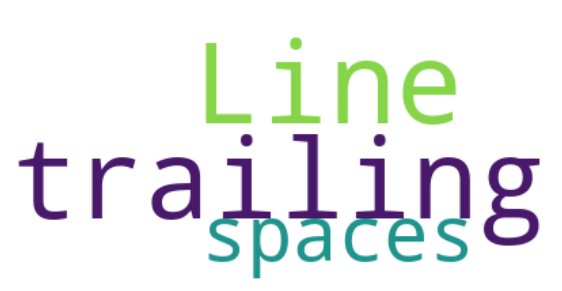

In [194]:

#Create the wordcloud object
wordcloud = WordCloud(collocations= COLLOCATIONS,
                        background_color="white",
                        collocation_threshold = COLLOCATION,
                        max_words = MAX_WORDS,
                        relative_scaling = 1).generate(texts[4])
#plot
plt.figure(figsize=(7,5), dpi=100)
plt.imshow(wordcloud, interpolation='bilInear')
plt.axis('off')

plt.show()

In [195]:
# Process text
frequencies = wordcloud.process_text(texts[4])

print(frequencies)

{'Line': 1624, 'trailing': 1624, 'spaces': 1624}


In [196]:
texts[5]

"Name 'readLines' must match pattern '^A-Za-zA-Z-*$'.Name 'elements' must match pattern '^A-Za-zA-Z-*$'.Name 'I' must match pattern '^a-za-zA-Z-*$'.Name 'IndxNumEven' must match pattern '^a-za-zA-Z-*$'.Name 'readAwordnumber' must match pattern '^A-Za-zA-Z-*$'.Name 'NumberToParse' must match pattern '^a-za-zA-Z-*$'.Name 'PA_FileAverage' must match pattern '^A-Za-zA-Z-*$'.Name 'Lab_' must match pattern '^A-Za-zA-Z-*$'.Name 'interest_year_one' must match pattern '^a-za-zA-Z-*$'.Name 'interest_second_year' must match pattern '^a-za-zA-Z-*$'.Name 'interest_third_year' must match pattern '^a-za-zA-Z-*$'.Name 'averageColumns' must match pattern '^A-Za-zA-Z-*$'.Name 'stringAnalogy' must match pattern '^A-Za-zA-Z-*$'.Name 'threeInput' must match pattern '^A-Za-zA-Z-*$'.Name 'ANSI_RESET' must match pattern '^a-za-zA-Z-*$'.Name 'ANSI_CYAN' must match pattern '^a-za-zA-Z-*$'.Name 'ANSI_PURPLE' must match pattern '^a-za-zA-Z-*$'.Name 'ANSI_GREEN' must match pattern '^a-za-zA-Z-*$'.Name 'pa' must ma

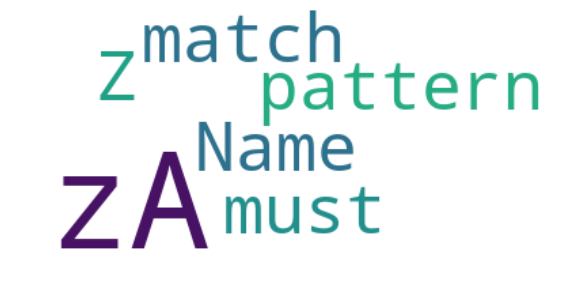

In [197]:

#Create the wordcloud object
wordcloud = WordCloud(collocations= COLLOCATIONS,
                        background_color="white",
                        collocation_threshold = COLLOCATION,
                        max_words = MAX_WORDS,
                        relative_scaling = 1).generate(texts[5])
#plot
plt.figure(figsize=(7,5), dpi=100)
plt.imshow(wordcloud, interpolation='bilInear')
plt.axis('off')

plt.show()

In [198]:
# Process text
frequencies = wordcloud.process_text(texts[5])

print(frequencies)

{'Name': 315, "readLines'": 1, 'must': 315, 'match': 315, 'pattern': 315, 'zA': 627, 'Z': 315, "elements'": 1, "I'": 2, "IndxNumEven'": 1, "readAwordnumber'": 1, "NumberToParse'": 1, "PA_FileAverage'": 1, "Lab_'": 2, "interest_year_one'": 1, "interest_second_year'": 1, "interest_third_year'": 1, "averageColumns'": 1, "stringAnalogy'": 1, "threeInput'": 1, "ANSI_RESET'": 3, "ANSI_CYAN'": 3, "ANSI_PURPLE'": 3, "ANSI_GREEN'": 3, "pa'": 2, "stringchecker'": 1, "VowTot'": 1, "PA_CompareArrays'": 2, "mul_tables'": 1, "PA_MultTable'": 1, "gradeTranslator'": 2, "PA__MultiplicationTable'": 1, "Number'": 1, "Product'": 1, "hello'": 2, "PA__Calculator'": 2, "range'": 1, "MAX_RAND_VAL'": 2, "Pa_Marquez'": 2, "vowelCount'": 1, "IS_EQUAL_MASK'": 1, "x_bits'": 1, "got_second'": 5, "want_second'": 5, "TEST'": 2, "SUCCESS'": 4, "FAILURE'": 4, "METHOD_STACK_INDEX'": 5, "PA_Methods'": 1, "PA_Temperature'": 1, "string'": 1, "randomMethod'": 1, "Lab_b'": 4, "Temp'": 3, "Num'": 1, "A'": 1, "B'": 1, "C'": 4,

In [199]:
texts[6]

'File contains tab characters (this is the first instance).File contains tab characters (this is the first instance).File does not end with a newline.File does not end with a newline.File contains tab characters (this is the first instance).Unused import - java io.File.Expected @param tag for \'list\'.@return tag should be present and have description.@return tag should be present and have description.@return tag should be present and have description.File does not end with a newline.File does not end with a newline.File contains tab characters (this is the first instance).File contains tab characters (this is the first instance).File does not end with a newline.File contains tab characters (this is the first instance).File does not end with a newline.File does not end with a newline.Using the \' *\' form of import should be avoided - java.io.*.Unused @param tag for \'variables\'.Unused @param tag for \'variable\'.Unused @param tag for \'variables\'.Unused @param tag for \'Scanner\'.Un

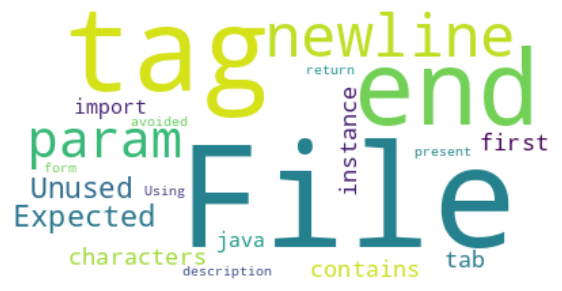

In [200]:

#Create the wordcloud object
wordcloud = WordCloud(collocations= COLLOCATIONS,
                        background_color="white",
                        collocation_threshold = COLLOCATION,
                        max_words = MAX_WORDS,
                        relative_scaling = 1).generate(texts[6])
#plot
plt.figure(figsize=(7,5), dpi=100)
plt.imshow(wordcloud, interpolation='bilInear')
plt.axis('off')

plt.show()

In [201]:
 # Process text
frequencies = wordcloud.process_text(texts[6])

print(frequencies)

{'File': 260, 'contains': 72, 'tab': 72, 'characters': 72, 'first': 72, 'instance': 72, 'end': 187, 'newline': 187, 'Unused': 89, 'import': 65, 'java': 63, 'io': 12, 'Expected': 93, 'param': 163, 'tag': 210, "list'": 1, 'return': 42, 'present': 39, 'description': 39, 'Using': 41, 'form': 41, 'avoided': 41, "variables'": 2, "variable'": 2, "Scanner'": 1, "array'": 9, "args'": 26, "a'": 5, 'Redundant': 5, 'lang': 18, 'package': 5, 'Math': 11, "x'": 12, "y'": 12, "z'": 12, 'util': 35, 'Arrays': 2, 'javax': 6, 'swing': 4, "double'": 15, "rand'": 1, "values'": 1, "arr'": 12, "b'": 4, "allTheSame'": 1, 'abs': 1, 'input': 1, 'Variable': 5, "METHOD_STACK_INDEX'": 2, 'must': 5, 'private': 5, 'accessor': 5, 'methods': 5, "firstArray'": 2, "secondArray'": 2, 'Duplicate': 3, "random'": 1, "length'": 1, "teachersExample'": 1, "three'": 4, "str'": 5, "input'": 1, 'stream': 2, "gradeMap'": 1, "PASS_STATUS'": 1, "FAIL_STATUS'": 1, "inta'": 2, "intb'": 2, 'followed': 2, 'whitespace': 2, 'InputMismatchE